# Hopfield Model

## Neural Network for Associative Memory

## Its Analogy to Ising Model and Spin Glasses

### Kai Zhang, Columbia University, 2018

Ref: 

J. J. Hopfield (1982), Neural networks and physical systems with emergent collective computational abilities

D. J. Amit, H. Gutfreund and H. Sompolinsky (1985), Spin-glass models of neural networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
def Spin_to_Occupancy(s):
    """
    -1, 1 to 0, 1
    """
    n = (s + 1)/2
    return n

def Occupancy_to_Spin(n):
    """
    0, 1 to -1, 1
    """
    s = n*2 - 1
    return s

def OneD_to_TwoD(A):
    """
    A: p by N array
    B: p by sqrt(N) by sqrt(N)
    """
    p = A.shape[0]
    n = A.shape[1]
    nx = int(math.sqrt(n))    
    B = np.reshape(A, (p, nx, nx))
    
    return B

def PlotOnePattern(s):
    """
    s: one d spin array of length N
    """
    s = s.reshape(1, -1)
    #n = Spin_to_Occupancy(s)
    n2D = OneD_to_TwoD(s)
    plt.imshow(n2D[0],cmap="gray",vmin=-1, vmax=1)

def PlotAllPattern(s, ni, nj):
    #n = Spin_to_Occupancy(s)
    n2D = OneD_to_TwoD(s)
        
    fig, axes = plt.subplots(ni,nj,figsize=(3*ni,3*nj))
    for i in range(ni):
        for j in range(nj):
            k = i*ni + j
            axes[i][j].imshow(n2D[k, :, :],cmap="gray",vmin=-1, vmax=1)


def Energy(S, w):
    """
    w: N by N weight matrix
    S: array of length N
    """
    H = np.dot(S, np.dot(w, S.T))
    H = -0.5 * H
    
    return H

def McCullochPitts(S, i, w):
    """
    S: array of length N
    """    
    Si = int(np.sign(np.sum(w[i, :] * S)))
    S[i] = Si
    
    return S 


def Glauber(S, i, w, beta):
    """
    S: array of length N
    """  
    hi = np.sum(w[i, :] * S)
    gh = 1.0 / (1.0 + math.exp(-np.clip(2.0*beta*hi, -250, 250)))
    
    if np.random.rand() < gh:
        S[i] = 1
    else:
        S[i] = -1
    
    return S 

## Stored Patterns (retrieval states)
p: number of patterns to be stored

N: number of neurons

$\xi_i^{\mu} = \pm 1$: value of pattern $\mu$ of neuron $i$

$S_i = \pm 1$: value of neuron $i$ at any moment

In [3]:
p = 25
N = 100
np.random.seed(seed=123)
xi_occ = np.random.randint(2, size=(p, N)) 
xi = Occupancy_to_Spin(xi_occ)

### Plot patterns: 0/1  = black/white or -1/1  = black/white

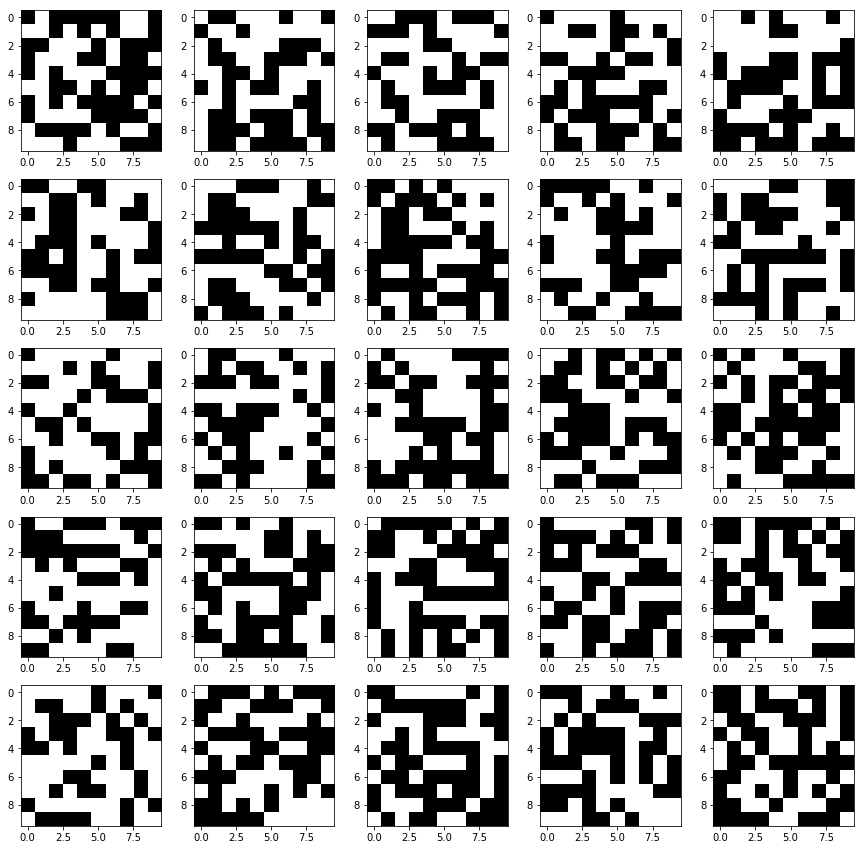

In [4]:
PlotAllPattern(xi, 5, 5) 

# Hebb rule
connection strength (weight) between neuron $i$ and $j$

$w_{ij} = \frac{1}{N} \sum_{\mu=1}^p \xi_i^{\mu} \xi_j^{\mu}$, $i, j = 1, 2, \dots, N$

In [5]:
w = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        for mu in range(p):
            w[i][j] = w[i][j] + xi[mu, i]*xi[mu, j]
        w[i][j] = w[i][j] / N       

(100, 100)


array([[ 0.25,  0.03, -0.09, ...,  0.09,  0.03,  0.05],
       [ 0.03,  0.25,  0.01, ...,  0.03,  0.01,  0.03],
       [-0.09,  0.01,  0.25, ..., -0.05,  0.01,  0.03],
       ...,
       [ 0.09,  0.03, -0.05, ...,  0.25,  0.07,  0.05],
       [ 0.03,  0.01,  0.01, ...,  0.07,  0.25,  0.07],
       [ 0.05,  0.03,  0.03, ...,  0.05,  0.07,  0.25]])

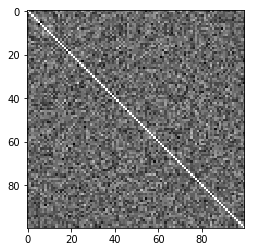

In [6]:
plt.imshow(w,cmap="gray") # , vmin=-0.04, vmax=0.04
print(w.shape)
w

### Hopfield energy function

$H = -\frac{1}{2} \sum_i\sum_j w_{ij} S_i S_j = -\frac{1}{2N} \sum_{\mu=1}^p (\sum_i S_i\xi_i)^2$

In [7]:
E_retrieval = []
index = range(p)
for mu in range(p):
    E_retrieval.append(Energy(xi[mu], w))

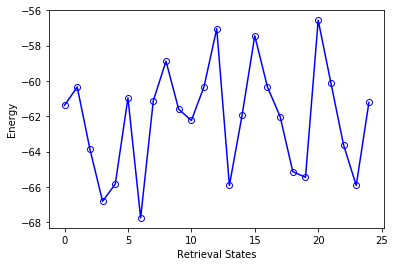

In [8]:
plt.figure()

plt.xlabel('Retrieval States')
plt.ylabel('Energy')

plt.plot(index, E_retrieval, 'bo-', mfc='none')

plt.show()

## Initial State

### reverse state

$S_i = - \xi_i^{\mu}$

In [9]:
S = np.copy(-xi[0])

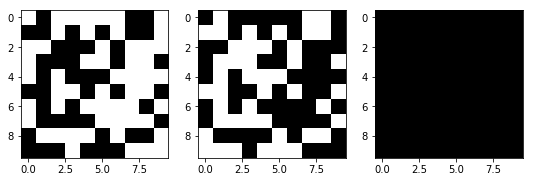

In [10]:
plt.figure(figsize=(9,9))

plt.subplot(131)
PlotOnePattern(S)

plt.subplot(132)
PlotOnePattern(xi[0])

plt.subplot(133)
PlotOnePattern(S*xi[0])

#plt.show()

### 3 - mixture state

$S_i = {\rm sign} (\pm \xi_i^{\lambda} \pm \xi_i^{\mu} \pm \xi_i^{\nu} )$

In [11]:
c0=1
c1=-1
c2=1

S0 = np.sign(np.copy(c0*xi[0] + c1*xi[1] + c2*xi[2]) )
S = S0

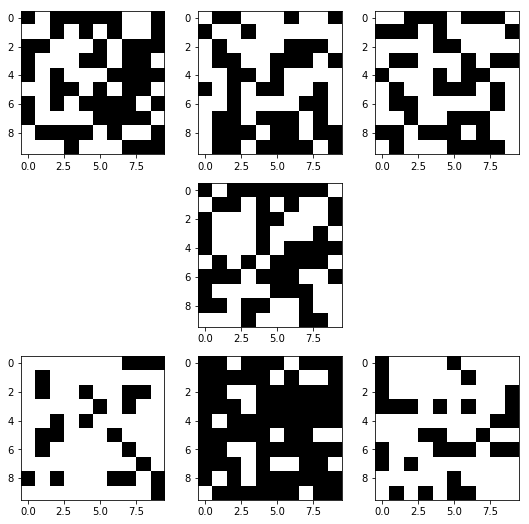

In [12]:
plt.figure(figsize=(9,9))

plt.subplot(331)
PlotOnePattern(xi[0])

plt.subplot(332)
PlotOnePattern(xi[1])

plt.subplot(333)
PlotOnePattern(xi[2])

plt.subplot(335)
PlotOnePattern(S)


plt.subplot(337)
PlotOnePattern(S*xi[0])

plt.subplot(338)
PlotOnePattern(S*xi[1])

plt.subplot(339)
PlotOnePattern(S*xi[2])


### random state

$S_i =  \xi_i^{\mu} + noise$ 

In [16]:
np.random.seed(seed=123)
noise_level = 0.3
S = np.copy(xi[0])
for i in range(N):
    if np.random.rand() < noise_level:
        S[i] = -S[i]

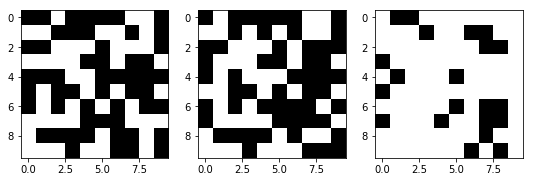

In [14]:
plt.figure(figsize=(9,9))

plt.subplot(131)
PlotOnePattern(S)

plt.subplot(132)
PlotOnePattern(xi[0])

plt.subplot(133)
PlotOnePattern(S*xi[0])

### McCulloch-Pitts deterministic rule

$S_i = {\rm sign}(\sum_{j=1}^N w_{ij} S_j)$

initial energy:  -29.12
epoch:  0 	energy:  -48.5
epoch:  1 	energy:  -60.34000000000001
epoch:  2 	energy:  -60.96000000000001
epoch:  3 	energy:  -61.78
epoch:  4 	energy:  -61.78
epoch:  5 	energy:  -61.78
epoch:  6 	energy:  -61.78
epoch:  7 	energy:  -61.78
epoch:  8 	energy:  -61.78
epoch:  9 	energy:  -61.78
epoch:  10 	energy:  -61.78
epoch:  11 	energy:  -61.78
epoch:  12 	energy:  -61.78
epoch:  13 	energy:  -61.78
epoch:  14 	energy:  -61.78
epoch:  15 	energy:  -61.78
epoch:  16 	energy:  -61.78
epoch:  17 	energy:  -61.78
epoch:  18 	energy:  -61.78
epoch:  19 	energy:  -61.78
epoch:  20 	energy:  -61.78
epoch:  21 	energy:  -61.78
epoch:  22 	energy:  -61.78
epoch:  23 	energy:  -61.78
epoch:  24 	energy:  -61.78
epoch:  25 	energy:  -61.78
epoch:  26 	energy:  -61.78
epoch:  27 	energy:  -61.78
epoch:  28 	energy:  -61.78
epoch:  29 	energy:  -61.78


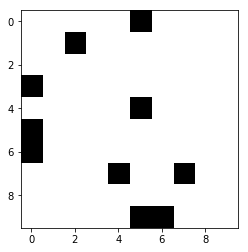

In [15]:
n_epoch = 30
batch_size = 100

np.random.seed(seed=123)
#ilist = range(batch_size)

epochlist = []
energy = []
H = Energy(S, w)
print("initial energy: ", H)

for epoch in range(n_epoch):
    ilist =  np.random.randint(N, size = batch_size)
    for batch in range(batch_size):
        i = ilist[batch]
        S = McCullochPitts(S, i, w)
        H = Energy(S, w)
    epochlist.append(epoch)
    energy.append(H)
    print('epoch: ', epoch, "\tenergy: ", H)

PlotOnePattern(S*xi[0])
#plt.show()

### Glauber stochasitic dynamics at temperature $\beta=1/T$

$h_i = \sum_{j=1}^N w_{ij} S_j$

$g_i = \frac{1}{1 + \exp(-2\beta h_i)} = {\rm Prob}(S_i =  1)$

$\langle S_i \rangle = g_i - (1-g_i) = \tanh (\beta h_i)$

initial energy:  -29.12
epoch:  0 	energy:  -48.48000000000001
epoch:  1 	energy:  -52.64
epoch:  2 	energy:  -57.680000000000014
epoch:  3 	energy:  -57.68000000000001
epoch:  4 	energy:  -60.900000000000006
epoch:  5 	energy:  -60.96000000000001
epoch:  6 	energy:  -60.96000000000001
epoch:  7 	energy:  -61.680000000000014
epoch:  8 	energy:  -61.680000000000014
epoch:  9 	energy:  -61.680000000000014
epoch:  10 	energy:  -62.10000000000001
epoch:  11 	energy:  -61.46000000000001
epoch:  12 	energy:  -61.52000000000001
epoch:  13 	energy:  -61.52
epoch:  14 	energy:  -61.78000000000001
epoch:  15 	energy:  -61.78000000000001
epoch:  16 	energy:  -61.92000000000001
epoch:  17 	energy:  -61.92
epoch:  18 	energy:  -61.92000000000001
epoch:  19 	energy:  -61.92
epoch:  20 	energy:  -61.92000000000001
epoch:  21 	energy:  -61.78000000000001
epoch:  22 	energy:  -61.78000000000001
epoch:  23 	energy:  -61.78000000000001
epoch:  24 	energy:  -62.10000000000001
epoch:  25 	energy:  -62.0000

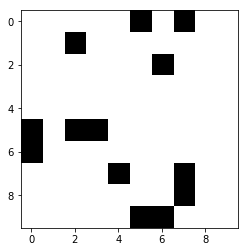

In [17]:
n_epoch = 80
batch_size = 100
beta = 5.0

np.random.seed(seed=123)
#ilist = range(batch_size)

epochlist2 = []
energy2 = []
H = Energy(S, w)
print("initial energy: ", H)

for epoch in range(n_epoch):
    ilist =  np.random.randint(N, size = batch_size)
    for batch in range(batch_size):
        i = ilist[batch]
        S = Glauber(S, i, w, beta)
        H = Energy(S, w)
    epochlist2.append(epoch)
    energy2.append(H)
    print('epoch: ', epoch, "\tenergy: ", H)

PlotOnePattern(S*xi[0])


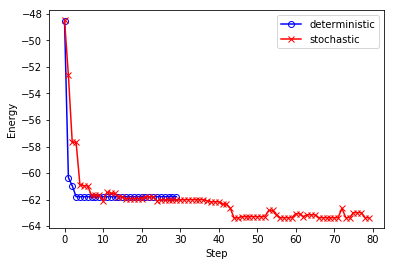

In [18]:
plt.figure()

plt.xlabel('Step')
plt.ylabel('Energy')

plt.plot(epochlist, energy, 'bo-', mfc='none')
plt.plot(epochlist2, energy2, 'rx-', mfc='none')

plt.legend(['deterministic', 'stochastic'])

plt.show()